<a href="https://colab.research.google.com/github/Akash12-sudo/Akash12-sudo.github.io/blob/master/Skin_Disease_Detection_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout 
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# gpus = tf.config.experimental.list_physical_devices('GPU') 
# for gpu in gpus:
#   tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
## Connecting to the google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzipping the zipped folder containing dataset
import zipfile
dataset_ref = zipfile.ZipFile('/content/drive/MyDrive/dataset.zip')
dataset_ref.extractall('/content')
dataset_ref.close()

In [ ]:
# Data Processing Step
train_dir = '/content/train'
val_dir = '/content/test'

### Data augmentation technique to prevent overfitting
# training dataset generator 
train_datagen = ImageDataGenerator(        
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# validation dataset generator
val_datagen = ImageDataGenerator(
    rescale = 1./255
)

### Loading the dataset
# training dataset
train_ds = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (256, 256),
    class_mode = "categorical",
    batch_size = 32,
)

# validation dataset
val_ds = val_datagen.flow_from_directory(
    val_dir, 
    target_size = (256, 256),
    class_mode = "categorical",
)



Found 2327 images belonging to 8 classes.
Found 1379 images belonging to 8 classes.


In [ ]:
# Importing the VGG19 model
from keras.applications.vgg19 import VGG19
base_model = VGG19(weights = 'imagenet', include_top = False, input_shape = (256, 256, 3))

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
# Adding fully connected layers for prediction 
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation = 'relu')(x)
predictions = Dense(8, activation = 'softmax')(x)

model = keras.models.Model(inputs = base_model.input, outputs = predictions)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
hist = model.fit(train_ds, epochs = 100, validation_data = val_ds)

Epoch 1/100
73/73 [==============================] - 63s 858ms/step - loss: 1.7668 - accuracy: 0.3640 - val_loss: 1.8253 - val_accuracy: 0.3256
Epoch 2/100
73/73 [==============================] - 62s 841ms/step - loss: 1.6789 - accuracy: 0.3846 - val_loss: 1.7430 - val_accuracy: 0.3938
Epoch 3/100
73/73 [==============================] - 71s 976ms/step - loss: 1.6770 - accuracy: 0.3850 - val_loss: 1.8159 - val_accuracy: 0.3655
Epoch 4/100
73/73 [==============================] - 63s 859ms/step - loss: 1.6449 - accuracy: 0.4057 - val_loss: 1.8670 - val_accuracy: 0.3169
Epoch 5/100
73/73 [==============================] - 61s 842ms/step - loss: 1.5533 - accuracy: 0.4504 - val_loss: 1.6939 - val_accuracy: 0.4141
Epoch 6/100
73/73 [==============================] - 63s 868ms/step - loss: 1.5670 - accuracy: 0.4207 - val_loss: 1.8135 - val_accuracy: 0.3669
Epoch 7/100
73/73 [==============================] - 63s 868ms/step - loss: 1.4919 - accuracy: 0.4555 - val_loss: 1.9581 - val_accuracy:

In [ ]:
from tensorflow.keras.metrics import Recall, Precision, Accuracy, CategoricalAccuracy

In [ ]:
recall = Recall()
precision = Precision()
accuracy = Accuracy()

In [ ]:
hist.history

{'loss': [1.766774296760559,
  1.6788654327392578,
  1.6769717931747437,
  1.644911766052246,
  1.5532556772232056,
  1.5670086145401,
  1.491895079612732,
  1.5028141736984253,
  1.513607382774353,
  1.4734641313552856,
  1.4784767627716064,
  1.493444561958313,
  1.4473271369934082,
  1.4547218084335327,
  1.4005017280578613,
  1.3827316761016846,
  1.3891234397888184,
  1.377441644668579,
  1.3856637477874756,
  1.3771467208862305,
  1.3780676126480103,
  1.400195837020874,
  1.3982678651809692,
  1.3931918144226074,
  1.3487920761108398,
  1.345696210861206,
  1.3322502374649048,
  1.3203070163726807,
  1.3074290752410889,
  1.3122886419296265,
  1.325448989868164,
  1.307168960571289,
  1.325482964515686,
  1.258707046508789,
  1.263979434967041,
  1.2361316680908203,
  1.2774094343185425,
  1.2724286317825317,
  1.2550716400146484,
  1.2594653367996216,
  1.2398720979690552,
  1.2268893718719482,
  1.2778855562210083,
  1.2457998991012573,
  1.2298635244369507,
  1.21878325939178

In [ ]:
model.save('/content/drive/MyDrive/Models/model.h5')

In [ ]:
model.save_weights('/content/drive/MyDrive/Models/model_weights.h5')

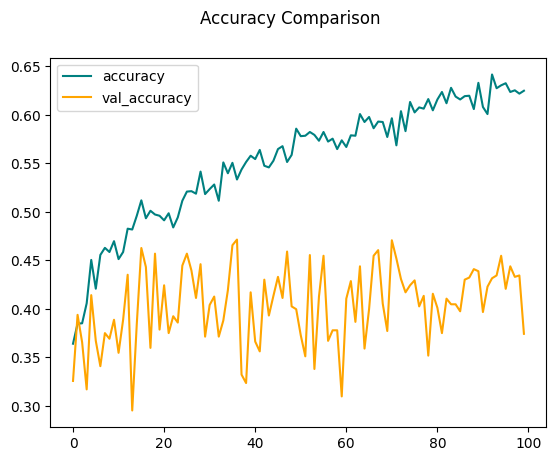

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy Comparison')
plt.legend(loc = "upper left")
plt.show()

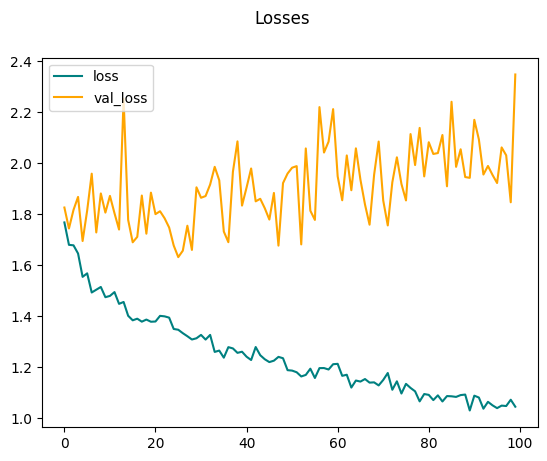

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Losses')
plt.legend(loc = "upper left")
plt.show()